# Import HTML and Lib

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests
import lxml
from bs4 import BeautifulSoup 
import sweetviz

In [2]:
url = "https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=2000"
headers = {'User-Agent': 'Mozilla/5.0'}
page = requests.get(url, headers=headers)
soup = BeautifulSoup(page.text, 'html.parser')

# Making Dataframe

In [4]:
rows = soup.find_all('article', itemprop='review')

In [14]:
review=[]

for row in rows:
    dic = {}
    dic ['Aircraft'] = row.find_all('td')[1].text
    dic ['Type of Traveler'] = row.find_all('td')[3].text
    dic ['Seat'] = row.find_all('td')[5].text
    dic ['Route'] = row.find_all('td')[7].text
    dic ['Date'] = row.find_all('td')[9].text
    dic ['Ratings'] = row.find_all('span', itemprop="reviewRating")
    dic ['Recommended'] = row.find('td', class_="review-value rating-yes")
    dic ['Review'] = row.find('h2', class_="text_header").text
    review.append(dic)
df = pd.DataFrame(review)

In [15]:
df

,Aircraft,Type of Traveler,Seat,Route,Date,Ratings,Recommended,Review
0,"A320, A380",Family Leisure,Business Class,Vienna to Los Angeles via London Heathrow,January 2023,[],None,"""the worst business class experience I've ever..."
1,Business,Business Class,London to San francisco,January 2023,12345,[],None,"""not recommended for business class"""
2,A321,Business,Economy Class,London to Belfast,January 2023,[],[yes],"""surprisingly a good product"""
3,A380,Business,Economy Class,Doha to London,December 2022,[],None,"""Maybe the old charm will return soon"""
4,Boeing 777,Couple Leisure,Business Class,London to Barbados,December 2022,[],None,"""having to pay to reserve a specific seat"""
...,...,...,...,...,...,...,...,...
1995,Couple Leisure,Economy Class,DXB to LHR,May 2016,12345,[],None,"""very disappointing experience"""
1996,Boeing 747-400,Solo Leisure,Economy Class,LHR to DXB,May 2016,[],[yes],"""BA falls down on presentation"""
1997,A380,Solo Leisure,Premium Economy,LHR to SFO,May 2016,[],[yes],"""seat was very comfortable"""
1998,Boeing 777-200,Couple Leisure,Economy Class,LGW to PUJ,May 2016,[],[yes],"""overall a negative experience"""


# Data Cleaning

In [6]:
df = df [df['Aircraft'].isin(['A320','A380','Boeing 777','Boeing 747-400','Boeing 747','A319','Boeing 744','Boeing 777-200 '])]
df = df [df['Seat'].isin(['Solo Leisure','Couple Leisure','Family Leisure','Business','Business Class','Premium Economy'])]
df.reset_index(drop=True, inplace=True)
df

,Aircraft,Type of Traveler,Seat,Route,Date,Ratings,Recommended,Review
0,Boeing 777,Couple Leisure,Business Class,Barbados to London Heathrow,December 2022,[],None,"""appallingly uncomfortable flights"""
1,A320,Business,Business Class,Glasgow to London,December 2022,[],None,"""late and delayed"""
2,Boeing 777,Couple Leisure,Premium Economy,London to Boston,December 2022,[],[yes],"""learned my lesson about late BA upgrades"""
3,A320,Solo Leisure,Business Class,London to Prague,November 2022,[],None,"""No curtain between business and economy class"""
4,A320,Solo Leisure,Business Class,London to Marrakech,June 2022,[],[yes],"""eventually make good on their promise"""
...,...,...,...,...,...,...,...,...
365,Boeing 777,Couple Leisure,Business Class,UVF to LGW,June 2016,[],[yes],"""excellent cabin crew"""
366,Boeing 777,Couple Leisure,Premium Economy,LGW to UVF,May 2016,[],None,"""further delay was likely"""
367,A380,Solo Leisure,Premium Economy,LHR to SFO,May 2016,[],[yes],"""seat was very comfortable"""
368,A320,Family Leisure,Business Class,LHR to CDG,May 2016,[],[yes],"""one of my favourite airlines"""


In [7]:
df['Aircraft'].value_counts()

A320              109
Boeing 777         99
A380               59
Boeing 747-400     44
A319               29
Boeing 747         29
Boeing 744          1
Name: Aircraft, dtype: int64

In [8]:
for col in df:
    print(df[col].unique())

['Boeing 777' 'A320' 'A380' 'A319' 'Boeing 747-400' 'Boeing 747'
 'Boeing 744']
['Couple Leisure' 'Business' 'Solo Leisure' 'Family Leisure']
['Business Class' 'Premium Economy']
['Barbados to London Heathrow' 'Glasgow to London' 'London to Boston'
 'London to Prague' 'London to Marrakech' 'London to Lisbon'
 'London to Cape Town' 'London Heathrow to Nairobi'
 'Copenhagen to Heathrow' 'Madrid to San Francisco via London'
 'Miami to London Heathrow' 'Dubai to London' 'Orlando to London Gatwick'
 'Jersey to London Heathrow' 'London Heathrow to Jersey'
 'London to Marrakesh' 'San Francisco to London' 'London to Malaga'
 'Cancun to London Gatwick' 'London to Thira' 'Vancouver to London'
 'Johannesburg to London Heathrow' 'Athens to London'
 'Dubai to Milan Malpensa via London' 'Dubrovnik to London Heathrow'
 'Pisa to London Heathrow' 'London to Venice' 'London to Barcelona'
 'Barbados to Heathrow' 'Geneva to London' 'London to Barbados'
 'Cape Town to London Heathrow' 'Cape Town to Glasgow

TypeError: unhashable type: 'ResultSet'

# Data Viz

### Pie Chart Most Used Aircraft

Text(0.5, 1.0, 'Aircraft')

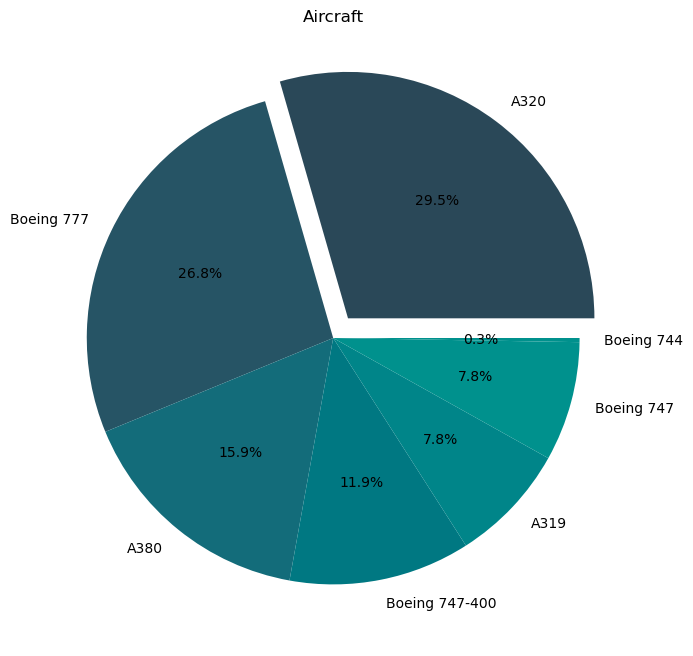

In [9]:
plt.figure(figsize=(8,8))

color =['#2a4858', '#265465','#136c7a','#007882','#008589','#00918d','#00918d'] 
exp=[0.1,0,0,0,0,0,0]
plt.pie(df['Aircraft'].value_counts(), labels=df['Aircraft'].value_counts().index, autopct='%1.1f%%',explode = exp, colors=color)
plt.title('Aircraft')


# Import to CSV and Excel

In [10]:
df.to_excel('review.xlsx',index=False)
df.to_csv('review.csv',index=False)